## How to Call R from Python: Plotting 

This is a code example in which we use the Python package rpy2 to create R plots. We use the r-packages 'graphics' and 'ggplot2' and display them here in this Jupyter Notebook.

This Notebook is for the [YouTube Video about using Rpy2 and plotting in Jupyter notebooks](https://youtu.be/RK-n78ZOXUg)

In [1]:
import rpy2.robjects as robjects
from rpy2.robjects.lib import grdevices
from rpy2.robjects.vectors import IntVector
from IPython.display import Image, display
from rpy2.robjects.conversion import localconverter

graphics = robjects.packages.importr('graphics')

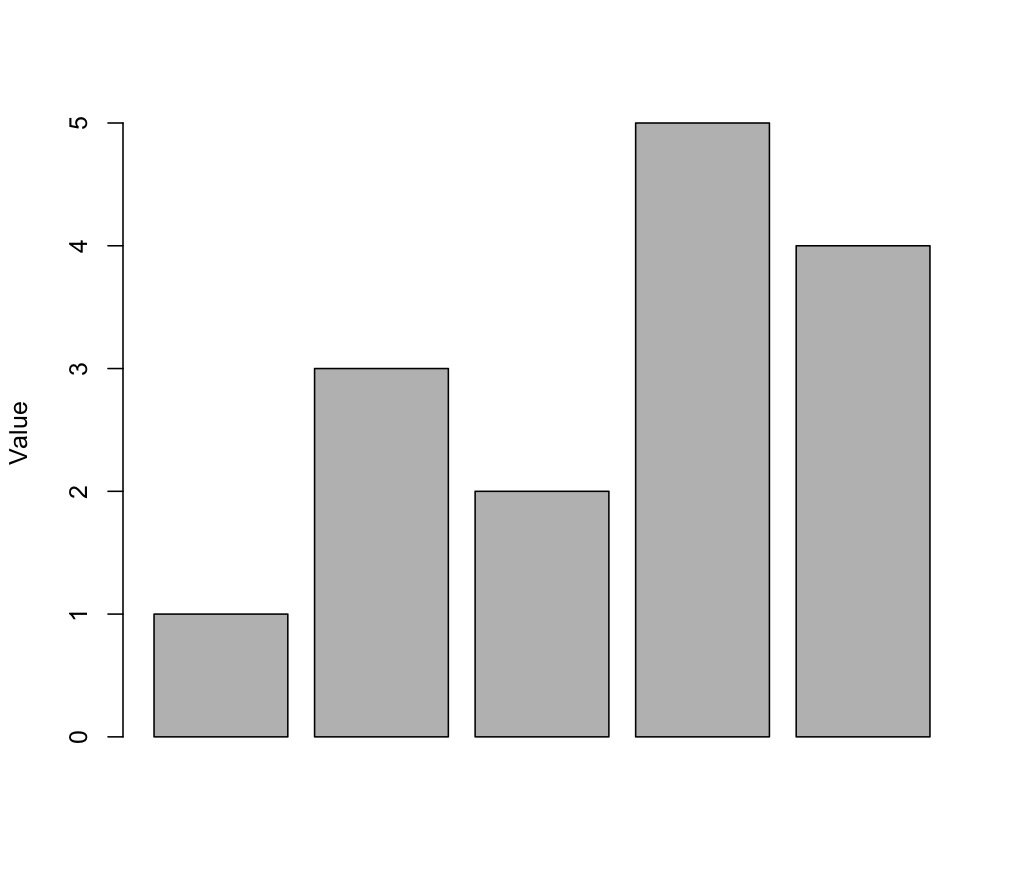

In [7]:
with localconverter(robjects.default_converter):
    with grdevices.render_to_bytesio(grdevices.jpeg, width=1024, height=896, res=150) as img:
        graphics.barplot(IntVector((1,3,2,5,4)), ylab="Value")
    
display(Image(data=img.getvalue(), format='jpeg', embed=True))

In [6]:
import rpy2.robjects.lib.ggplot2 as ggplot2

with localconverter(robjects.default_converter):
    
    datasets = robjects.packages.importr('datasets')
    mtcars = robjects.packages.data(datasets).fetch('mtcars')['mtcars']

    with grdevices.render_to_bytesio(grdevices.png, width=1024, height=896, res=150) as img:
        gp = ggplot2.ggplot(mtcars)
        pp = (
            gp
            + ggplot2.aes_string(x='wt', y='mpg')
            + ggplot2.geom_point(ggplot2.aes_string(colour='qsec'))
            + ggplot2.scale_colour_gradient(low='yellow', high='red')
            + ggplot2.labs(title='Rpy2 ggplot2 MTCARS')
            + ggplot2.theme_bw()
            + ggplot2.theme(**{'panel.grid.major': ggplot2.element_blank(),
                               'panel.grid.minor': ggplot2.element_blank()

            })

        )

        pp.plot()
    
display(Image(data=img.getvalue(), format='png', embed=True))

NotImplementedError: 
    Conversion rules for `rpy2.robjects` appear to be missing. Those
    rules are in a Python contextvars.ContextVar. This could be caused
    by multithreading code not passing context to the thread.
    